In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)

## 데이터 만들기
- 사람들의 키와 몸무게 데이터를 만들어 보도록 하겠습니다.


In [2]:
df = pd.DataFrame(columns=['height','weight'])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 90]
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,90


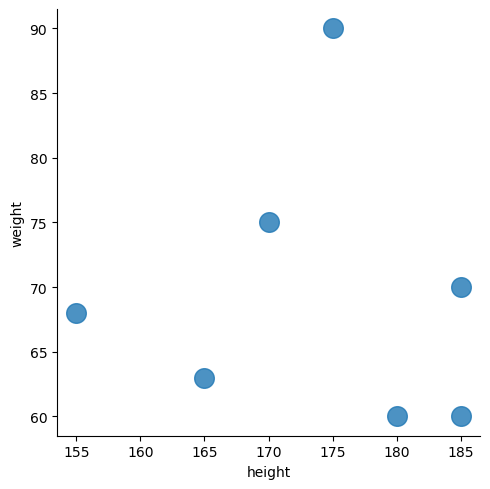

In [3]:
# 데이터 시각화
sns.lmplot(x = 'height', y = 'weight', data = df, fit_reg = False, scatter_kws={'s':200})

### k-평균 군집화
- sklearn의 kmean 라이브러리에 데이터를 활용하여, 데이터를 군집화합니다.

In [4]:
data_points = df.values
kmeans = KMeans(n_clusters = 3).fit(data_points)

In [5]:
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [172.5       ,  82.5       ],
       [160.        ,  65.5       ]])

In [10]:
# 데이터가 어느 군집에 소속되어 있는지 데이터프레임 'cluster_id' 컬럼에 저장한다.
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,90,1


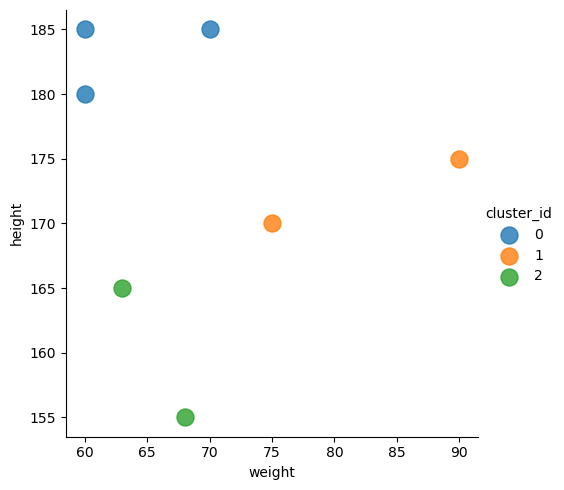

In [11]:
# k means 군집 시각화
sns.lmplot(x = 'weight', y = 'height', data = df, fit_reg = False, scatter_kws={'s':150}, hue='cluster_id')